# <font color = lightcoral>Ensemble Model
>    
### <font color = olive>Isolation Forest, OneClassSVM, LocalOutlierFactor

## <font color = grey> Admin

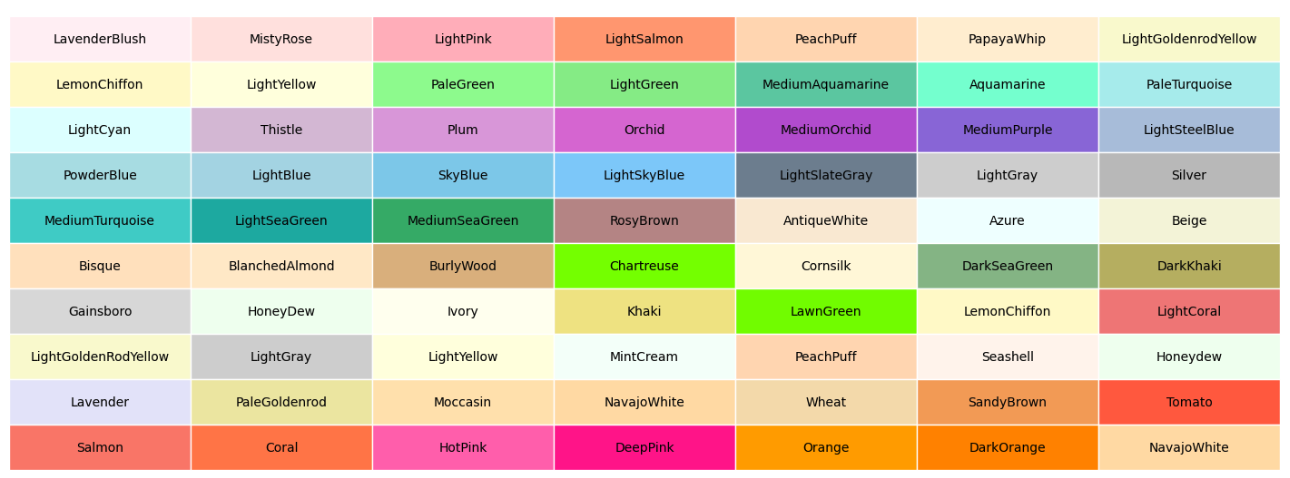

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


___
# <font color = darkkhaki> Feature Engg

### <font color = tomato> PreProcess Data

In [3]:
# import pandas as pd
# import os

# # Function to preprocess the data
# def preprocess_data(df):
#     # Convert hexadecimal strings to integers
#     def hex_to_int(hex_list):
#         if hex_list is None or len(hex_list) == 0:
#             return 0  # Return 0 for None or empty lists
#         try:
#             return int(hex_list[0][1:-1], 16)
#         except (ValueError, IndexError, TypeError):
#             return 0  # Return 0 for any conversion errors

#     df = df.applymap(hex_to_int)
    
#     return df

# # Define the target folder
# target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# # Define file paths
# file_paths = {
#     'train': os.path.join(target_folder, 'train.parquet'),
#     'test_normal': os.path.join(target_folder, 'test_normal.parquet'),
#     'test_abnormal': os.path.join(target_folder, 'test_abnormal.parquet')
# }

# # Process each file
# for file_key, file_path in file_paths.items():
#     # Read the Parquet file
#     df = pd.read_parquet(file_path)
    
#     # Preprocess data
#     df = preprocess_data(df)
    
#     # Save the preprocessed DataFrame as a Parquet file
#     preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
#     df.to_parquet(preprocessed_file_path)
    
#     print(f'Preprocessed {file_key} data saved to {preprocessed_file_path}')

# # Function to display file info
# def display_file_info(file_key, file_path):
#     df = pd.read_parquet(file_path)
#     print(f'--- {file_key} ---')
#     print(f'Number of rows: {df.shape[0]}')
#     print(f'Number of columns: {df.shape[1]}')
#     # print(df.head())
#     print('\n')

# # Display info for each file
# for file_key, file_path in file_paths.items():
#     preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
#     display_file_info(file_key, preprocessed_file_path)

#### Load and Review

In [4]:
import pandas as pd
import os

# Define the target folder
target_folder = '/home/ubuntu/efs-w210-capstone-ebs/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# Define file paths for the preprocessed files
file_paths = {
    # 'train': os.path.join(target_folder, 'train_preprocessed.parquet')
    # ,
    'test_normal': os.path.join(target_folder, 'test_normal_preprocessed.parquet')
    ,
    # 'test_abnormal': os.path.join(target_folder, 'test_abnormal_preprocessed.parquet')
}

# Function to display file info
def display_file_info(file_key, file_path):
    df = pd.read_parquet(file_path)
    print(f'--- {file_key} ---')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print(df.head())
    print('\n')

# Display info for each file
for file_key, file_path in file_paths.items():
    display_file_info(file_key, file_path)

--- test_normal ---
Number of rows: 20579
Number of columns: 42794
      0         1        2         3        4         5        6        7      \
0   8654015   8654015  8654015   6235107  6235107   6235107  6235107  6235107   
1    411112  10743712   411112  10743712   411112  10743712   411112   411112   
2  10975928         0        0         0        0         0        0        0   
3  11161828         0        0         0        0         0        0        0   
4  12504070         0        0         0        0         0        0        0   

     8         9         10        11       12       13       14        15     \
0  6235107   6235107   4706255   6235107  6235107  4706255  6235107   6235107   
1   411112  10743712  10743712  10743712   411112   411112   411112  10743712   
2        0         0         0         0        0        0        0         0   
3        0         0         0         0        0        0        0         0   
4        0         0         0         0 

___
# <font color = darkkhaki> IsolationForest - Next (Claude)
> after taking into account the categorical logic

### <font color = grey> Feature Engg

In [5]:
# import pandas as pd
# import numpy as np
# from scipy.stats import entropy
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Load the data
# train_data = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/train_preprocessed.parquet')
# test_normal = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_normal_preprocessed.parquet')
# test_abnormal = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_abnormal_preprocessed.parquet')

# def preprocess_data(df):
#     # 1. Event counts
#     event_counts = df.apply(lambda row: pd.Series(row.value_counts()), axis=1).fillna(0)
    
#     # 2. Unique events
#     unique_events = df.apply(lambda row: len(np.unique(row[row != 0])), axis=1)
    
#     # 3. Most frequent event
#     most_frequent_event = df.apply(lambda row: row.value_counts().index[0] if len(row.value_counts()) > 0 else 0, axis=1)
    
#     # 4. Number of transitions (changes from one event to another)
#     def count_transitions(row):
#         arr = row.values  # Convert to numpy array
#         return np.sum(arr[:-1] != arr[1:])
#     transitions = df.apply(count_transitions, axis=1)
    
#     # 5. Entropy of event distribution
#     def calculate_entropy(row):
#         arr = row.values[row.values != 0]  # Remove zeros and convert to numpy array
#         _, counts = np.unique(arr, return_counts=True)
#         return entropy(counts) if len(counts) > 0 else 0
#     entropy_values = df.apply(calculate_entropy, axis=1)
    
#     # Combine features
#     features = pd.concat([event_counts, 
#                           pd.Series(unique_events, name='unique_events'),
#                           pd.Series(most_frequent_event, name='most_frequent_event'),
#                           pd.Series(transitions, name='transitions'),
#                           pd.Series(entropy_values, name='entropy')], axis=1)
    
#     return features

# # Preprocess data
# X_train = preprocess_data(train_data)
# X_test_normal = preprocess_data(test_normal)
# X_test_abnormal = preprocess_data(test_abnormal)

In [6]:
# # Combine test datasets
# X_test_combined = pd.concat([X_test_normal, X_test_abnormal])
# y_test_combined = np.concatenate([np.zeros(test_normal.shape[0]), np.ones(test_abnormal.shape[0])])

### <font color = grey> Save files

In [7]:
# import pandas as pd
# import os

# # After preprocessing
# save_folder = '/mnt/efs-w210-capstone/200015/09.Models/20240702_IsolationForest_Claude'

# # Ensure the save folder exists
# os.makedirs(save_folder, exist_ok=True)

# # Save preprocessed data
# X_train.to_parquet(os.path.join(save_folder, 'X_train_preprocessed.parquet'))
# X_test_normal.to_parquet(os.path.join(save_folder, 'X_test_normal_preprocessed.parquet'))
# X_test_abnormal.to_parquet(os.path.join(save_folder, 'X_test_abnormal_preprocessed.parquet'))

# # Save labels for test data
# # Convert y_test_combined to a DataFrame before saving
# pd.DataFrame({'label': y_test_combined}).to_parquet(os.path.join(save_folder, 'y_test_combined.parquet'))

# print("Preprocessed data saved successfully.")

### <font color = grey> Reload saved files

In [8]:
import pandas as pd
import os
import numpy as np

# Set the folder path
# save_folder = '/mnt/efs-w210-capstone/200015/09.Models/20240702_IsolationForest_Claude'
save_folder = '/home/ubuntu/efs-w210-capstone-ebs/09.Models/20240702_IsolationForest_Claude'

# Load preprocessed data
X_train = pd.read_parquet(os.path.join(save_folder, 'X_train_preprocessed.parquet'))
X_test_normal = pd.read_parquet(os.path.join(save_folder, 'X_test_normal_preprocessed.parquet'))
X_test_abnormal = pd.read_parquet(os.path.join(save_folder, 'X_test_abnormal_preprocessed.parquet'))

# Load labels for test data
y_test_combined = pd.read_parquet(os.path.join(save_folder, 'y_test_combined.parquet'))['label'].values

# Combine test datasets
X_test_combined = pd.concat([X_test_normal, X_test_abnormal])

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Get all unique columns
all_columns = pd.Index(X_train.columns.union(X_test_combined.columns))

# Reindex all datasets to ensure they have the same columns
X_train = X_train.reindex(columns=all_columns, fill_value=0)
X_test_combined = X_test_combined.reindex(columns=all_columns, fill_value=0)

X_train = X_train.fillna(0)
X_test_combined = X_test_combined.fillna(0)

print("Preprocessed data loaded successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")

Preprocessed data loaded successfully.
X_train shape: (13718, 1005)
X_test_combined shape: (23597, 1005)
y_test_combined shape: (23597,)


### <font color = grey>Reindex Data to Match Columns:

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get all unique columns
all_columns = pd.Index(X_train.columns.union(X_test_normal.columns).union(X_test_abnormal.columns))

# Reindex all datasets
X_train = X_train.reindex(columns=all_columns, fill_value=0)
X_test_normal = X_test_normal.reindex(columns=all_columns, fill_value=0)
X_test_abnormal = X_test_abnormal.reindex(columns=all_columns, fill_value=0)

# Combine test datasets
X_test_combined = pd.concat([X_test_normal, X_test_abnormal])

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

---

In [10]:
# X_train.head()

In [11]:
# # Get the first row (row 0)
# first_row = X_train.iloc[0]

# # Find the column with the maximum value
# max_column = first_row.idxmax()

# # Get the maximum value
# max_value = first_row.max()

# print(f"Column with highest count: {max_column}")
# print(f"Highest count value: {max_value}")

# # # Optional: To see the top N highest counts
# # N = 5  # Change this to see more or fewer top counts
# # top_counts = first_row.nlargest(N)
# # print("\nTop", N, "counts:")
# # print(top_counts)

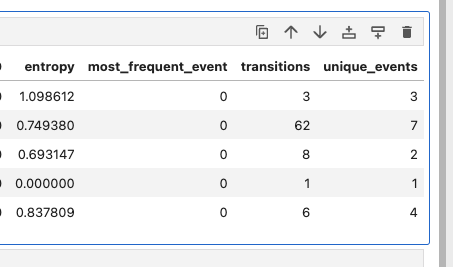

In [12]:
# print(X_train.columns)

___
<font color = red>The first column of X_train, named '0', represents the counts of the event ID '0' in each row of the original dataset. The values like 47501, 47115, 47496, etc., indicate the frequency of event ID '0' in those respective rows after preprocessing.
__


___
**Event counts:**

> For each row (which represents a 5-minute time window), it counts how many times each unique event occurs.

> This captures the frequency of different events in each time window.


**Unique events:**

> Counts the number of distinct event types in each time window.

> This gives an idea of the variety of events occurring in each window.


**Most frequent event:**

> Identifies the event that occurs most often in each time window.

> This can help detect if a particular event is dominating a time window.


**Number of transitions:**

> Counts how many times the event type changes within a time window.

> This captures the volatility or rate of change in event types.


**Entropy of event distribution:**

> Calculates the Shannon entropy of the event distribution in each time window.

> Higher entropy indicates more randomness or unpredictability in the events.

---

### <font color = grey> Build Ensemble Model

In [ ]:
# from sklearn.svm import OneClassSVM
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.base import BaseEstimator, ClassifierMixin
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns


# # def majority_voting(predictions):
# #     return np.mean(predictions, axis=0).round().astype(int)

# # def average_probability_voting(probabilities, threshold=0.5):
# #     avg_prob = np.mean(probabilities, axis=0)
# #     return (avg_prob >= threshold).astype(int)

# # def weighted_voting(predictions, weights):
# #     weighted_sum = np.dot(weights, predictions)
# #     return (weighted_sum >= np.sum(weights) / 2).astype(int)

# # def minimum_voting(predictions):
# #     return (np.sum(predictions, axis=0) > 0).astype(int)

# # def maximum_voting(predictions):
# #     return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)

# class AnomalyEnsemble(BaseEstimator, ClassifierMixin):
#     def __init__(self, contamination=0.1, voting='majority', weights=None):
#         self.contamination = contamination
#         self.voting = voting
#         self.weights = weights
#         self.detectors = [
#             IsolationForest(contamination=self.contamination, random_state=42),
#             OneClassSVM(nu=self.contamination),
#             LocalOutlierFactor(novelty=True, contamination=self.contamination)
#         ]

#     def fit(self, X):
#         for detector in self.detectors:
#             detector.fit(X)
#         return self

#     def predict(self, X):
#         predictions = np.array([detector.predict(X) for detector in self.detectors])
#         predictions = (predictions == -1).astype(int)  # Convert to 0 and 1
        
#         if self.voting == 'majority':
#             return np.mean(predictions, axis=0).round().astype(int)
#         elif self.voting == 'average':
#             return np.mean(predictions, axis=0).astype(int)
#         elif self.voting == 'weighted':
#             if self.weights is None:
#                 raise ValueError("Weights must be provided for weighted voting.")
#             return weighted_voting(predictions, self.weights)
#         elif self.voting == 'minimum':
#             return (np.sum(predictions, axis=0) > 0).astype(int)
#         elif self.voting == 'maximum':
#             return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)
#         else:
#             raise ValueError(f"Unknown voting method: {self.voting}")

In [13]:
# Enhance the ensemble with more diverse models
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN

def majority_voting(predictions):
    return np.mean(predictions, axis=0).round().astype(int)

def average_probability_voting(probabilities, threshold=0.5):
    avg_prob = np.mean(probabilities, axis=0)
    return (avg_prob >= threshold).astype(int)

def weighted_voting(predictions, weights):
    weighted_sum = np.dot(weights, predictions)
    return (weighted_sum >= np.sum(weights) / 2).astype(int)

def minimum_voting(predictions):
    return (np.sum(predictions, axis=0) > 0).astype(int)

def maximum_voting(predictions):
    return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)

class EnhancedAnomalyEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, contamination=0.1, voting='majority', weights=None):
        self.contamination = contamination
        self.voting = voting
        self.weights = weights
        self.detectors = [
            IsolationForest(contamination=self.contamination, random_state=42),
            OneClassSVM(nu=self.contamination),
            LocalOutlierFactor(novelty=True, contamination=self.contamination),
            EllipticEnvelope(contamination=self.contamination),
            DBSCAN(eps=0.5, min_samples=5)
        ]

    def fit(self, X):
        for detector in self.detectors:
            detector.fit(X)
        return self

    def predict(self, X):
        predictions = []
        for detector in self.detectors:
            if isinstance(detector, DBSCAN):
                labels = detector.fit_predict(X)
                pred = (labels == -1).astype(int)
            else:
                pred = detector.predict(X)
                pred = (pred == -1).astype(int)  # Convert to 0 and 1
            predictions.append(pred)
        
        predictions = np.array(predictions)
        
        if self.voting == 'majority':
            return np.mean(predictions, axis=0).round().astype(int)
        elif self.voting == 'average':
            return np.mean(predictions, axis=0).astype(int)
        elif self.voting == 'weighted':
            if self.weights is None:
                raise ValueError("Weights must be provided for weighted voting.")
            return weighted_voting(predictions, self.weights)
        elif self.voting == 'minimum':
            return (np.sum(predictions, axis=0) > 0).astype(int)
        elif self.voting == 'maximum':
            return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)
        else:
            raise ValueError(f"Unknown voting method: {self.voting}")

**Purpose:** Predict whether each instance in X is an inlier (normal) or an outlier (anomalous).

**Logic:**

> Collect predictions from each detector.

> Convert predictions: -1 for outliers and 1 for inliers to 0 for inliers and 1 for outliers.

> Use majority voting: Take the mean of predictions and round to get the final prediction (0 or 1).

### <font color = grey> Train Model

In [ ]:
# %%time

# # Create and train the ensemble with weighted voting
# weights = [0.5, 0.3, 0.2]
# ensemble = AnomalyEnsemble(contamination=0.1, voting='weighted', weights=weights)
# ensemble.fit(X_train)

In [14]:
# Create and train the enhanced ensemble with weighted voting
weights = [0.4, 0.2, 0.2, 0.1, 0.1]
ensemble = EnhancedAnomalyEnsemble(contamination=0.1, voting='weighted', weights=weights)
ensemble.fit(X_train)

EnhancedAnomalyEnsemble(voting='weighted', weights=[0.4, 0.2, 0.2, 0.1, 0.1])

# <font color = red> END

### <font color = grey> Save Model Locally

In [15]:
import joblib
import os

save_folder ='/home/ubuntu/efs-w210-capstone-ebs/09.Models/20240703_AnomalyEnsemble_Claude_L4'

# Ensure the directory exists
os.makedirs(save_folder, exist_ok=True)

# Save the trained ensemble model
joblib.dump(ensemble, os.path.join(save_folder, 'anomaly_ensemble_model.joblib'))

# Save the feature names (column names)
joblib.dump(X_train.columns.tolist(), os.path.join(save_folder, 'feature_names.joblib'))

# Save the contamination value used
joblib.dump(ensemble.contamination, os.path.join(save_folder, 'contamination.joblib'))

# Optionally, save individual models in the ensemble
for i, detector in enumerate(ensemble.detectors):
    joblib.dump(detector, os.path.join(save_folder, f'detector_{i}.joblib'))

print("Ensemble model and related data saved successfully.")

Ensemble model and related data saved successfully.


### <font color = grey> Reload saved Model

In [16]:
import joblib
import os

load_folder = '/home/ubuntu/efs-w210-capstone-ebs/09.Models/20240703_AnomalyEnsemble_Claude_L4'

#/home/ubuntu/efs-w210-capstone-ebs/

# Load the ensemble model
loaded_ensemble = joblib.load(os.path.join(load_folder, 'anomaly_ensemble_model.joblib'))

# Load feature names
feature_names = joblib.load(os.path.join(load_folder, 'feature_names.joblib'))

# Load contamination value
contamination = joblib.load(os.path.join(load_folder, 'contamination.joblib'))

print("Ensemble model and related data loaded successfully.")

# You can now use the loaded_ensemble for predictions
# Make sure your test data has the same features as feature_names
X_test_combined = X_test_combined.reindex(columns=feature_names, fill_value=0)

Ensemble model and related data loaded successfully.


### <font color = grey> Evaluation

---

In [18]:
def majority_voting(predictions):
    return np.mean(predictions, axis=0).round().astype(int)

def average_probability_voting(probabilities, threshold=0.5):
    avg_prob = np.mean(probabilities, axis=0)
    return (avg_prob >= threshold).astype(int)

def weighted_voting(predictions, weights):
    weighted_sum = np.dot(weights, predictions)
    return (weighted_sum >= np.sum(weights) / 2).astype(int)

def minimum_voting(predictions):
    return (np.sum(predictions, axis=0) > 0).astype(int)

def maximum_voting(predictions):
    return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)

Results for Ensemble (Combined Test Set):
Accuracy: 0.8669
Precision (Weighted): 0.9322
Recall (Weighted): 0.8669
F1-score (Weighted): 0.8839

Class-specific Metrics:
Class 0 - Precision: 0.9970, Recall: 0.8499, F1-score: 0.9176
Class 1 - Precision: 0.4899, Recall: 0.9828, F1-score: 0.6539

Confusion Matrix:
[[17491  3088]
 [   52  2966]]


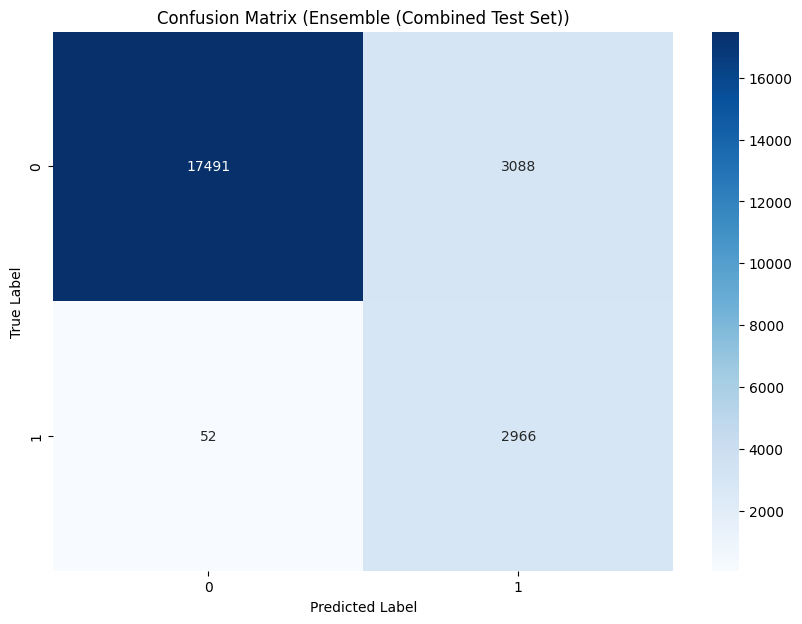

CPU times: user 1min 18s, sys: 1.24 s, total: 1min 19s
Wall time: 51.6 s


In [19]:
%%time

from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate the model
def evaluate_model(model, X, y, dataset_name):
    # Fill NaN values with 0
    X = X.fillna(0)
    
    # Predict the labels
    y_pred = model.predict(X)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Calculate precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')
    
    # Calculate class-specific metrics
    class_report = classification_report(y, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
    class_0_precision = class_report['Class 0']['precision']
    class_0_recall = class_report['Class 0']['recall']
    class_0_f1 = class_report['Class 0']['f1-score']
    class_1_precision = class_report['Class 1']['precision']
    class_1_recall = class_report['Class 1']['recall']
    class_1_f1 = class_report['Class 1']['f1-score']
    
    # Print results
    print(f"Results for {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-score (Weighted): {f1:.4f}")
    print("\nClass-specific Metrics:")
    print(f"Class 0 - Precision: {class_0_precision:.4f}, Recall: {class_0_recall:.4f}, F1-score: {class_0_f1:.4f}")
    print(f"Class 1 - Precision: {class_1_precision:.4f}, Recall: {class_1_recall:.4f}, F1-score: {class_1_f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return cm, y_pred

# Evaluate the ensemble
cm, y_pred = evaluate_model(ensemble, X_test_combined, y_test_combined, "Ensemble (Combined Test Set)")
# cm, y_pred = evaluate_model(loaded_ensemble, X_test_combined, y_test_combined, "Ensemble (Combined Test Set)")

___
# <font color = darkkhaki> Ideas

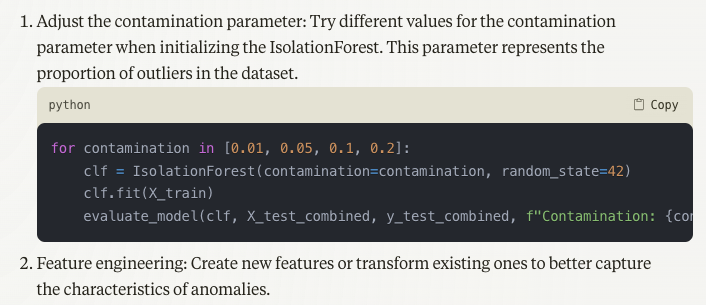

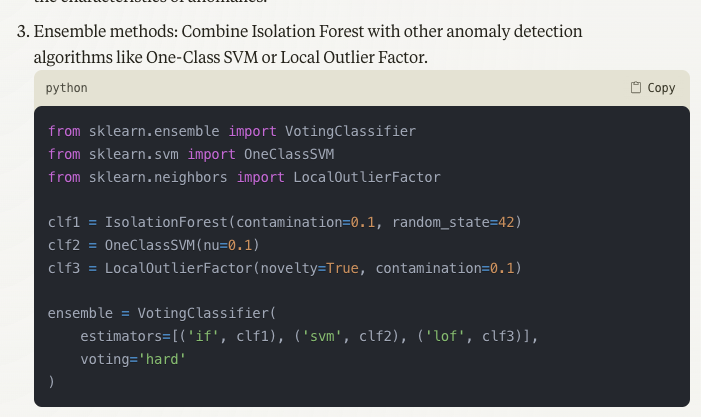

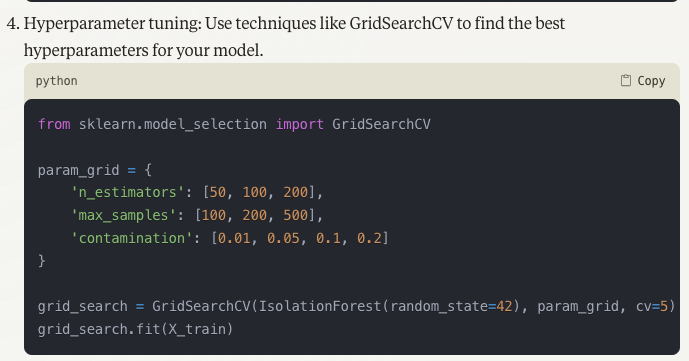

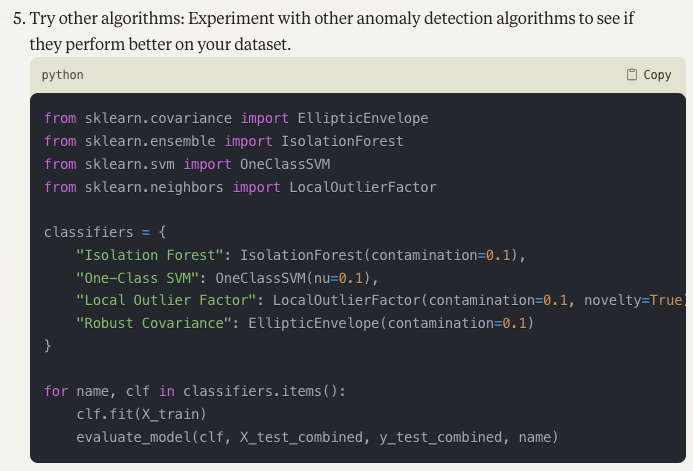

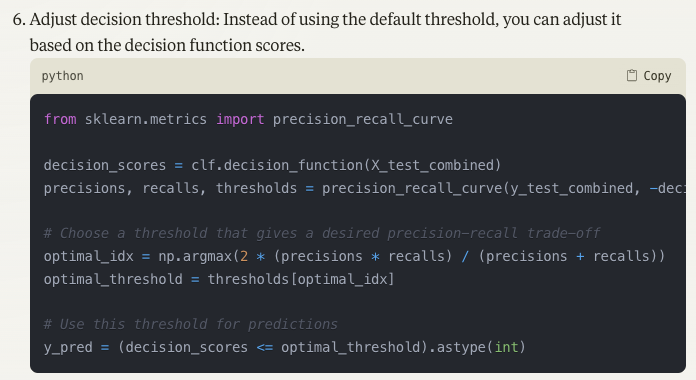

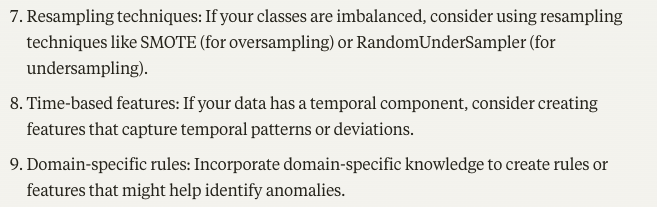

___

#### <font color = tomato>Results Backup
> 
> 
___

___
# <font color = darkkhaki> M

___

#### <font color = tomato>Results Backup
> 
> 
___